In [1]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from pyphotonicsims.components.elements import *

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

## Coupled resonator basics
 - FSR $\Delta\nu = \frac{c}{n_g L}$
 - Propagation loss $\alpha$ and intrinsic loss rate
 $$\gamma_{in} = c\alpha$$
 - Resonator coupling coefficient $\kappa^2$ and coupling/external loss rate
 $$\gamma_{ex} = \frac{c\log{1/\tau^2}}{n_g L} \approx \frac{c\kappa^2}{n_g L}  (\kappa^2 << 1)$$
 - Coupled mode equation for resonances
 $$\frac{da}{dt} = (i\Delta\omega - \gamma)a + i\sqrt{\gamma_{ex}}s_{in}$$
 $$s_{out} = \tau s_{in} + i\sqrt{\gamma_{ex}}a$$

### Add-drop resonator split resonance

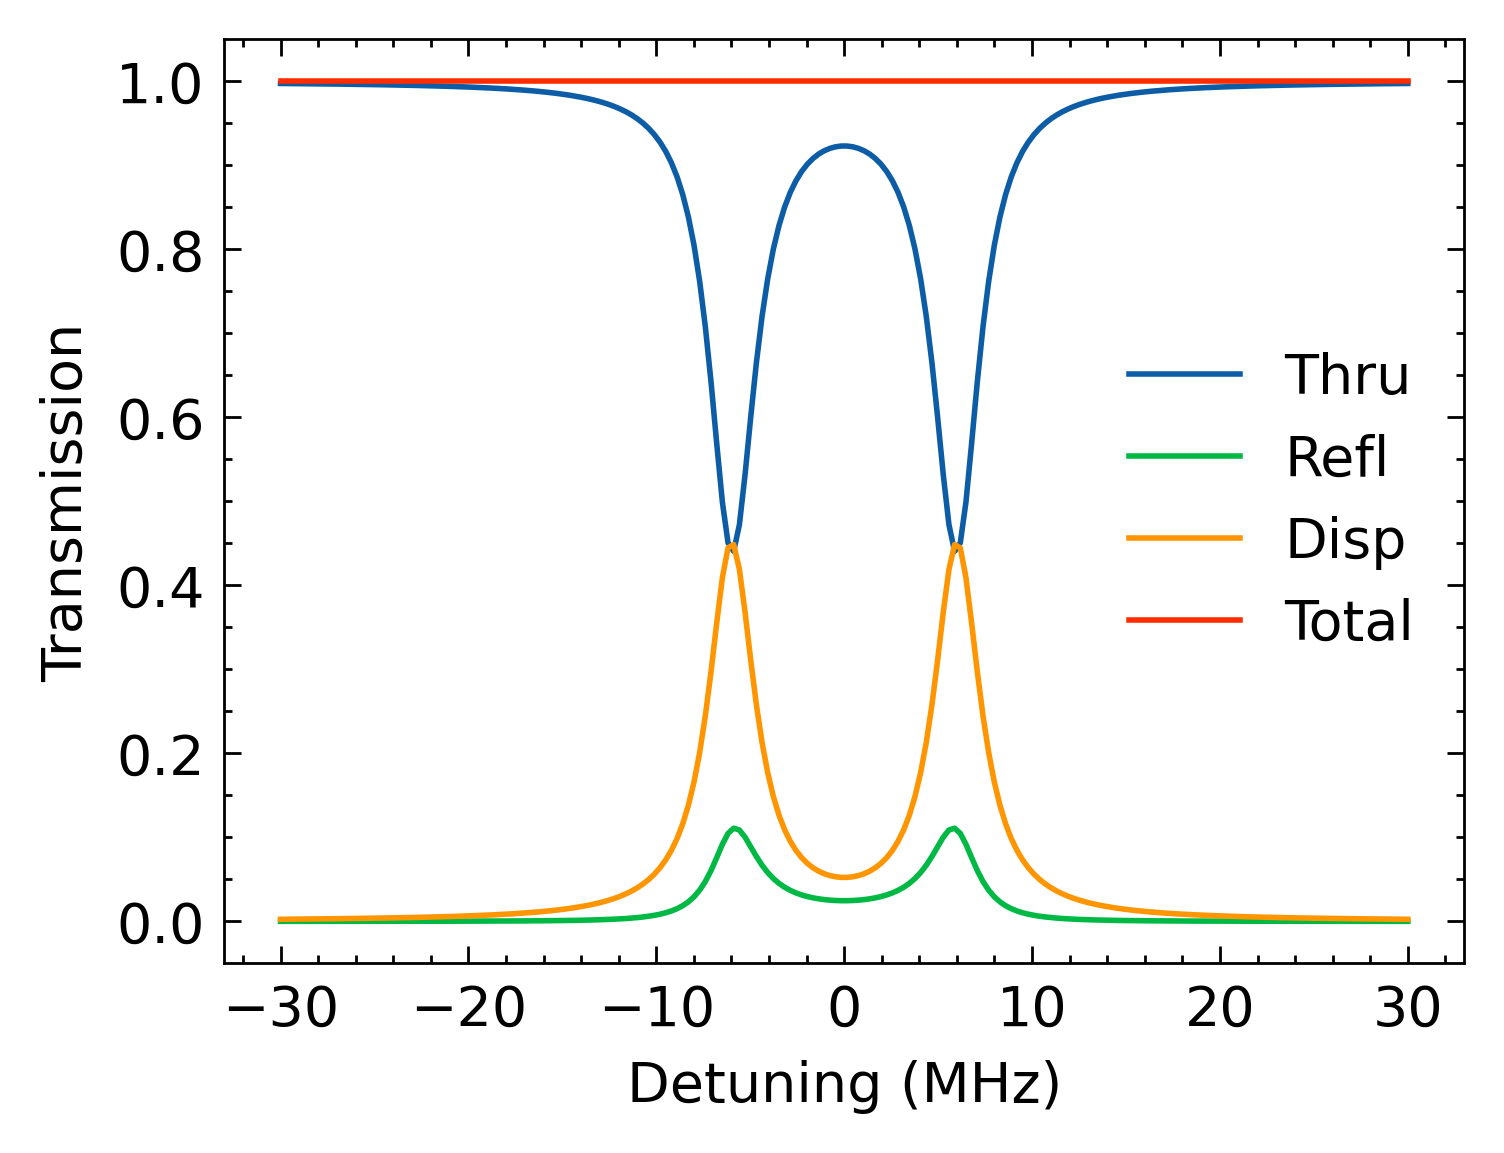

In [15]:
r_in = 2.0
r_ex = 1.0

x = np.linspace(-10, 10, 200)*(r_in + r_ex)
# F1, D = FAddThru(x, r_in, r_ex)
# F1, F2, D = FAddThruDrop(x, r_in, r_ex, r_ex)
F1, F2, D = FAddThruSplit(x, r_in, r_ex, r_in*3)
T = np.abs(F1)**2
R = np.abs(F2)**2
D = np.abs(D)**2
plt.figure(dpi = 400)
plt.plot(x, T, label = 'Thru')
plt.plot(x, R, label = 'Refl')
plt.plot(x, D, label = 'Disp')
plt.plot(x, T +R+ D, label = 'Total')
plt.xlabel('Detuning (MHz)')
plt.ylabel('Transmission')
plt.legend()

### Add-drop resonator

In [ ]:
r_in = 1.0
r_ex = 1.0
x = np.linspace(-10, 10, 200)*(r_in + r_ex)
phix = np.array([0, 1, 2, 3, 4])*pi/4

for phi in phix:
    F = FAddThruFano(x, r_in, r_ex, phi)
    T = np.abs(F)**2
    plt.plot(x, T, label = f'{phi/(pi):.2f}' + f'$\pi$')
plt.xlabel('Detuning (MHz)')
plt.ylabel('Transmission')
plt.legend()

### Fano resonance caused by a phase shift term $\phi$
$$s_{out} = e^{i\phi}\tau s_{in} + i\sqrt{\gamma_{ex}}a$$

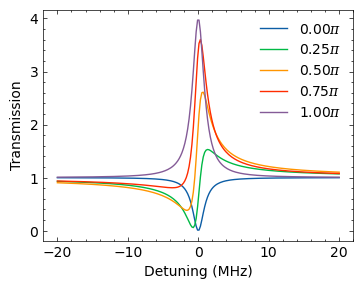

In [11]:
r_in = 1.0
r_ex = 1.0
x = np.linspace(-10, 10, 200)*(r_in + r_ex)
phix = np.array([0, 1, 2, 3, 4])*pi/4

for phi in phix:
    F = FAddThruFano(x, r_in, r_ex, phi)
    T = np.abs(F)**2
    plt.plot(x, T, label = f'{phi/(pi):.2f}' + f'$\pi$')
plt.xlabel('Detuning (MHz)')
plt.ylabel('Transmission')
plt.legend()

### Add-thru transmission with sideband-modulated input
 - Phase modulation depth $\beta$
 $$E(t) = Ae^{i(\omega t + \beta\sin(\Omega t))} = Ae^{i\omega t}\sum_{\nu=-n, 0, n}{J_\nu(\beta)e^{i\nu\Omega t}}$$
 - When $\beta$ is small, 
 $$E(t) = Ae^{i\omega t}(J_0 + J_{-1}e^{-i\Omega t} + J_{1}e^{i\Omega t}) = Ae^{i\omega t}(J_0 + J_{1}e^{i\Omega t} - J_{1}e^{-i\Omega t})$$
 $$E(t) = Ae^{i\omega t}(J_0 + 2iJ_{1}\sin{\Omega t}) = Ae^{i\omega t}(1 + i\beta\sin{\Omega t})$$

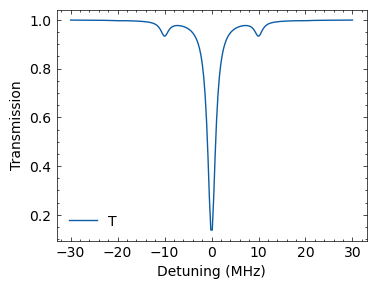

In [14]:
from scipy.special import jv
n = 3
beta = 0.5
fm = 10.0
Js = np.array([jv(ii - n, beta) for ii in range(2*n + 1)])

r_in = 1.0
r_ex = 1.0
x = np.linspace(-15, 15, 200)*(r_in + r_ex)
T = np.zeros(len(x))

for ii, js in enumerate(Js):
    F, _ = FAddThru(x - fm*(ii - n), r_in, r_ex)
    T = T + js**2 * np.abs(F)**2

plt.plot(x, T, label = 'T')
plt.xlabel('Detuning (MHz)')
plt.ylabel('Transmission')
plt.legend()

In [31]:
Js

array([-2.08203158e-05,  1.24895866e-03, -4.99375260e-02,  9.97501562e-01,
        4.99375260e-02,  1.24895866e-03,  2.08203158e-05])